## Multiple Regression

In [26]:
1+1

2

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [28]:
df=pd.read_csv('temp1.csv')

In [29]:
df

,year,month,interest_rate,unemployment_rate,index_price
0,2022,1,1.5,5.2,3200
1,2022,2,1.6,5.1,3225
2,2022,3,1.7,5.0,3250
3,2022,4,1.8,4.9,3275
4,2022,5,1.9,4.8,3300
5,2022,6,2.0,4.7,3325
6,2022,7,2.1,4.6,3350
7,2022,8,2.2,4.5,3375
8,2022,9,2.3,4.4,3400
9,2022,10,2.4,4.3,3425


In [30]:
# df = df.drop(columns=['year', 'month'],axis=1, inplace=True)

In [31]:
df = df.drop(columns=['year', 'month'])

In [32]:
df

,interest_rate,unemployment_rate,index_price
0,1.5,5.2,3200
1,1.6,5.1,3225
2,1.7,5.0,3250
3,1.8,4.9,3275
4,1.9,4.8,3300
5,2.0,4.7,3325
6,2.1,4.6,3350
7,2.2,4.5,3375
8,2.3,4.4,3400
9,2.4,4.3,3425


In [33]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

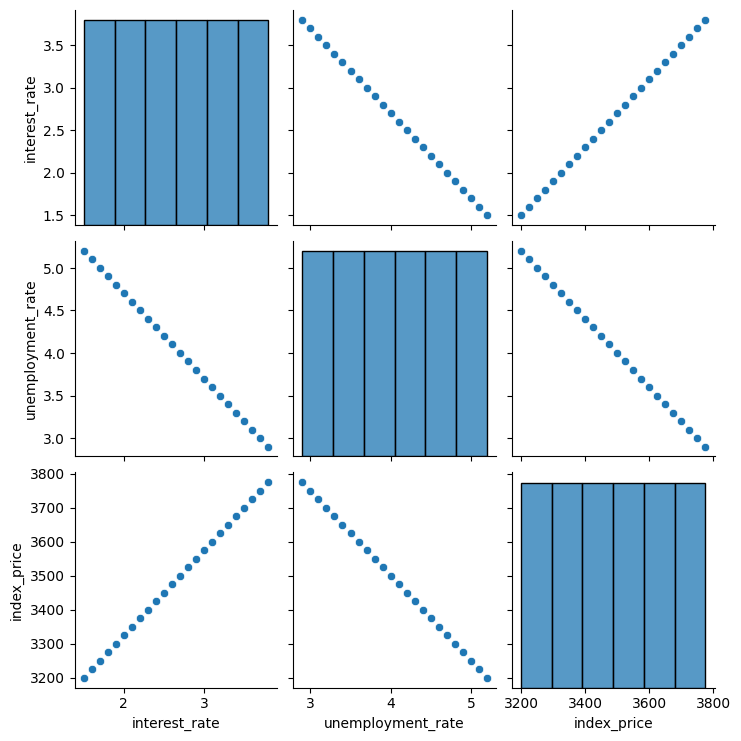

In [34]:
import seaborn as sns
sns.pairplot(df)

In [35]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.0,-1.0,1.0
unemployment_rate,-1.0,1.0,-1.0
index_price,1.0,-1.0,1.0


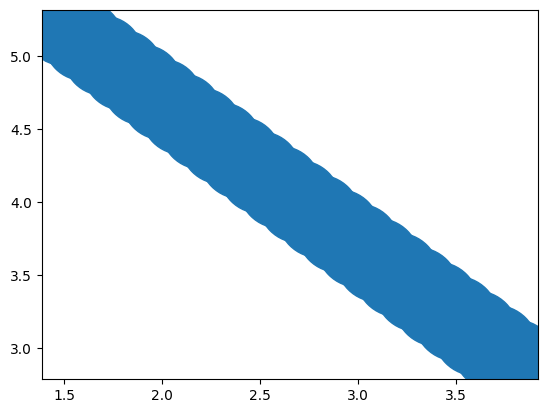

In [41]:
plt.scatter(df['interest_rate'], df['unemployment_rate'],df['index_price'])

In [45]:
# Train Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['interest_rate', 'unemployment_rate']], df['index_price'], test_size=0.2, random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

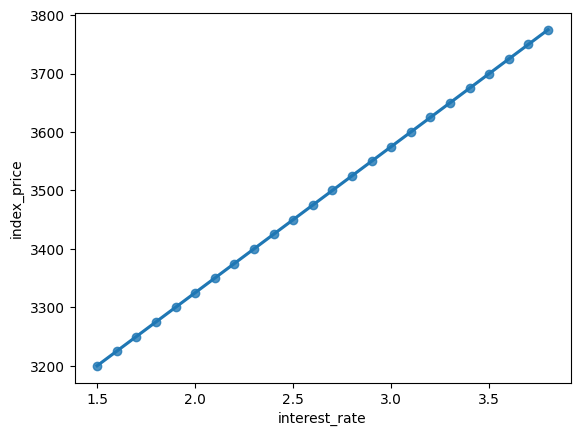

In [ ]:
# Basic approximate line of regression visuaized by seaborn
sns.regplot(x=df['interest_rate'], y=df['index_price'])

In [47]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

In [48]:
print(np.shape(x_train))
print(np.shape(x_test))

(19, 2)
(5, 2)


In [49]:
x_train

array([[-0.38875313,  0.38875313],
       [ 0.17942452, -0.17942452],
       [-1.52510843,  1.52510843],
       [ 1.31577983, -1.31577983],
       [-0.95693078,  0.95693078],
       [-1.38306402,  1.38306402],
       [ 0.03738011, -0.03738011],
       [ 0.46351335, -0.46351335],
       [-1.24101961,  1.24101961],
       [-1.09897519,  1.09897519],
       [ 1.45782424, -1.45782424],
       [ 0.74760217, -0.74760217],
       [ 1.17373541, -1.17373541],
       [ 1.59986865, -1.59986865],
       [-0.67284196,  0.67284196],
       [-0.24670872,  0.24670872],
       [ 0.32146893, -0.32146893],
       [ 1.031691  , -1.031691  ],
       [-0.81488637,  0.81488637]])

In [50]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

regression.fit(x_train,y_train)


LinearRegression()

In [53]:
print(regression.intercept_)
print(regression.coef_)

3493.4210526315787
[ 88.0006453 -88.0006453]


In [54]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regression,x_train,y_train,cv=5,scoring='neg_mean_squared_error')

In [ ]:
np.mean(score)

array([-5.16987883e-26, -0.00000000e+00, -0.00000000e+00, -2.06795153e-25,
       -0.00000000e+00])